### Метрики відстані:

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools


def distance(x1, x2, type = "euclidean"):
    if len(x1) == len(x2):
        if type == "euclidean":
            return (np.sum( (np.array(x1) - np.array(x2)) ** 2) ) ** (0.5)
        elif type == "euclidean_square":
            return (np.sum( (np.array(x1) - np.array(x2)) ** 2) )
        elif type == "L1":
            return np.sum( np.abs(np.array(x1) - np.array(x2)))
        elif type == "chebyshevan":
            return np.max( np.abs(np.array(x1) - np.array(x2)))
    return None

### Підготовка даних згідно варіанту:

In [ ]:
data = pd.read_excel('Диабет.xlsx')
data.head()

,№,Уровень холестерина,Стабілізована глюкоза,Ліпопротеїни,Співвідношення холестерину до ліпопротеїну,Гемоглобін,Вік,Стать,Зріст,Вага,Систолічний тиск,Діастолічний тиск,Талія (дюйм),Стегна (дюйми),Протромбіновий час
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,138.0,80.0,44.0,41.0,300.0


In [ ]:
data = data[["Вік", "Систолічний тиск", "Діастолічний тиск", "Вага"]]
data.head()

,Вік,Систолічний тиск,Діастолічний тиск,Вага
0,46,118.0,59.0,121.0
1,29,112.0,68.0,218.0
2,58,190.0,92.0,256.0
3,67,110.0,50.0,119.0
4,64,138.0,80.0,183.0


In [ ]:
# Перевід до зручного вигляду
prepared_data = []
for i in range(len(data)):
    prepared_data.append([data["Вік"][i], data["Систолічний тиск"][i], data["Діастолічний тиск"][i], data["Вага"][i]])
prepared_data[:10]

[[46, 118.0, 59.0, 121.0],
 [29, 112.0, 68.0, 218.0],
 [58, 190.0, 92.0, 256.0],
 [67, 110.0, 50.0, 119.0],
 [64, 138.0, 80.0, 183.0],
 [34, 132.0, 86.0, 190.0],
 [30, 161.0, 112.0, 191.0],
 [37, nan, nan, 170.0],
 [45, 160.0, 80.0, 166.0],
 [55, 108.0, 72.0, 202.0]]

### алгоритм кластеризації к-середніх з використанням розроблених метрик:

In [ ]:
# Допоміжна функція відстані
def calcDis(dataSet, centroids, k, type = "euclidean"):
    clalist = []
    for data in dataSet:
        # 3 відстані
        distance1 = np.array([distance(data, centroids[i], type=type) for i in range(k)])
        clalist.append(distance1)
    clalist = np.array(clalist)
    return clalist

# Функція вибору кластеру
def classify(dataSet, centroids, k, type = "euclidean"):

    clalist = calcDis(dataSet, centroids, k, type = type)

    minDistIndices = np.argmin(clalist, axis=1)
    # Середнє значення всіх відстаней
    newCentroids = pd.DataFrame(dataSet).groupby(minDistIndices).mean()
    newCentroids = newCentroids.values

    changed = newCentroids - centroids

    return changed, newCentroids



def kmeans(dataSet, k, type = "euclidean"):
    # Підбір k випадкових центрів
    centroids = random.sample(dataSet, k)

    changed, newCentroids = classify(dataSet, centroids, k, type = type)
    # Зміна положення центру?
    while np.any(changed != 0):
        changed, newCentroids = classify(dataSet, newCentroids, k)

    centroids = sorted(newCentroids.tolist())

    cluster = []
    clalist = calcDis(dataSet, centroids, k)
    minDistIndices = np.argmin(clalist, axis=1)
    for i in range(k):
        cluster.append([])

    for i, j in enumerate(minDistIndices):
        cluster[j].append(dataSet[i])

    return centroids, cluster

### Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на стандартизованих даних (згідно варіанту):

3 Кластери:

In [ ]:
centroids3, cluster3 = kmeans(prepared_data, 3)
a = 1
for i in cluster3:
      print("Claster №" + str(a) + "\nCount " + str(len(i)))
      a += 1
      print(i[:5])

Claster №1
Count 187
[[46, 118.0, 59.0, 121.0], [67, 110.0, 50.0, 119.0], [34, 132.0, 86.0, 190.0], [37, nan, nan, 170.0], [60, 130.0, 90.0, 156.0]]
Claster №2
Count 99
[[29, 112.0, 68.0, 218.0], [58, 190.0, 92.0, 256.0], [55, 108.0, 72.0, 202.0], [47, 137.0, 100.0, 230.0], [38, 136.0, 83.0, 288.0]]
Claster №3
Count 117
[[64, 138.0, 80.0, 183.0], [30, 161.0, 112.0, 191.0], [45, 160.0, 80.0, 166.0], [50, 130.0, 100.0, 183.0], [62, 178.0, 90.0, 196.0]]


4 кластери:

In [ ]:
centroids4, cluster4 = kmeans(prepared_data, 4)
a = 1
for i in cluster4:
      print("Claster №" + str(a) + "\nCount " + str(len(i)))
      a += 1
      print(i[:5])

Claster №1
Count 115
[[46, 118.0, 59.0, 121.0], [67, 110.0, 50.0, 119.0], [37, nan, nan, 170.0], [60, 130.0, 90.0, 156.0], [40, nan, nan, 165.0]]
Claster №2
Count 81
[[29, 112.0, 68.0, 218.0], [58, 190.0, 92.0, 256.0], [47, 137.0, 100.0, 230.0], [38, 136.0, 83.0, 288.0], [37, 140.0, 95.0, 252.0]]
Claster №3
Count 145
[[64, 138.0, 80.0, 183.0], [34, 132.0, 86.0, 190.0], [55, 108.0, 72.0, 202.0], [38, 102.0, 68.0, 195.0], [27, 130.0, 80.0, 170.0]]
Claster №4
Count 62
[[30, 161.0, 112.0, 191.0], [45, 160.0, 80.0, 166.0], [62, 178.0, 90.0, 196.0], [70, 148.0, 88.0, 178.0], [66, 158.0, 88.0, 185.0]]


5 кластерів:

In [ ]:
centroids5, cluster5 = kmeans(prepared_data, 5)
a = 1
for i in cluster5:
      print("Claster №" + str(a) + "\nCount " + str(len(i)))
      a += 1
      print(i[:5])

Claster №1
Count 104
[[29, 112.0, 68.0, 218.0], [34, 132.0, 86.0, 190.0], [37, nan, nan, 170.0], [55, 108.0, 72.0, 202.0], [38, 102.0, 68.0, 195.0]]
Claster №2
Count 74
[[46, 118.0, 59.0, 121.0], [67, 110.0, 50.0, 119.0], [36, 110.0, 76.0, 126.0], [24, 100.0, 70.0, 113.0], [41, 144.0, 112.0, 118.0]]
Claster №3
Count 68
[[58, 190.0, 92.0, 256.0], [47, 137.0, 100.0, 230.0], [38, 136.0, 83.0, 288.0], [37, 140.0, 95.0, 252.0], [43, 124.0, 80.0, 253.0]]
Claster №4
Count 110
[[64, 138.0, 80.0, 183.0], [45, 160.0, 80.0, 166.0], [60, 130.0, 90.0, 156.0], [33, 130.0, 90.0, 157.0], [70, 148.0, 88.0, 178.0]]
Claster №5
Count 47
[[30, 161.0, 112.0, 191.0], [62, 178.0, 90.0, 196.0], [66, 158.0, 88.0, 185.0], [40, 180.0, 122.0, 189.0], [61, 170.0, 88.0, 191.0]]


### Візуалізувати результати кластеризації:

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

def vizualization3D(cluster, centroids, dop=[[0, 1, 2]]):
    for i in dop:
        fig = pyplot.figure()
        ax = Axes3D(fig)
        color = ['r', 'b', 'g', 'c', 'k', 'm']
        k = 0
        for dat in cluster:
            x = [j[i[0]] for j in dat]
            y = [j[i[1]] for j in dat]
            z = [j[i[2]] for j in dat]
            ax.scatter(x, y, z, c=color[k])
            ax.scatter(centroids[k][0], centroids[k][1], centroids[k][2], marker='x', c=color[k], s=200)
            k += 1
        pyplot.show()

3 кластери:

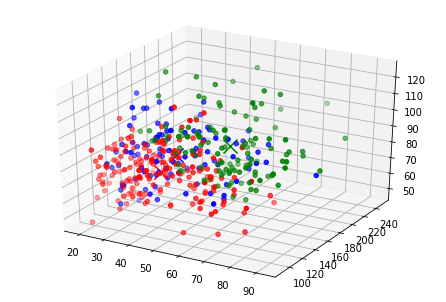

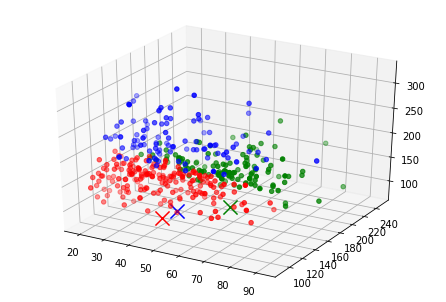

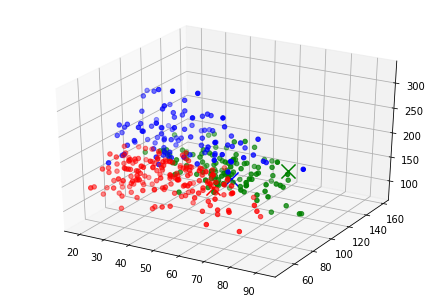

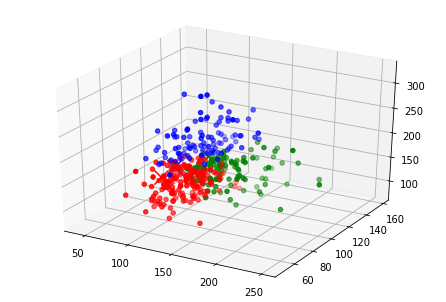

In [ ]:
vizualization3D(cluster3, centroids3, [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]])

4 кластери:

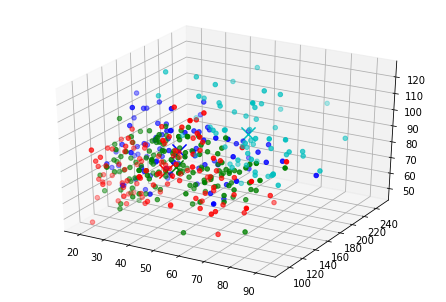

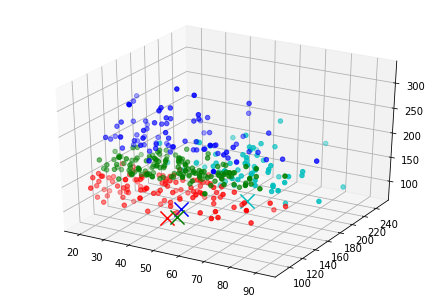

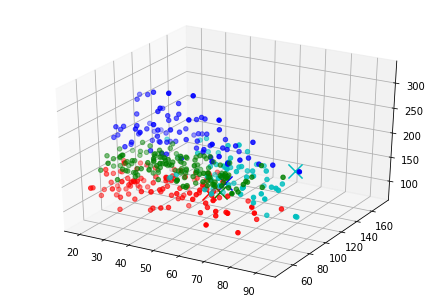

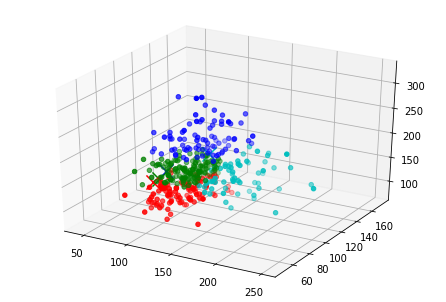

In [ ]:
vizualization3D(cluster4, centroids4, [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]])

5 кластерів:

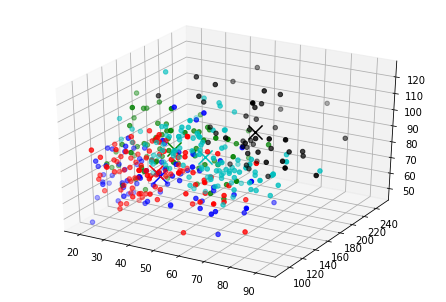

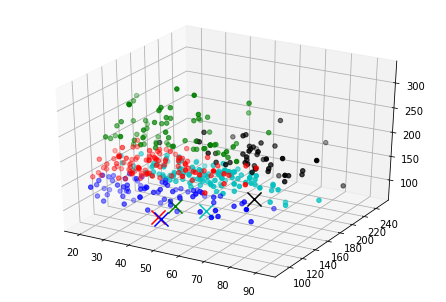

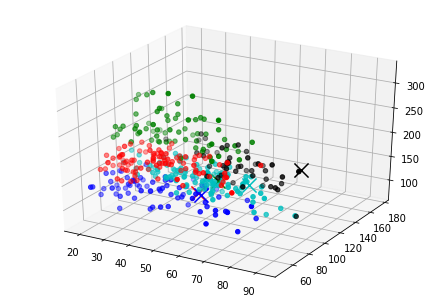

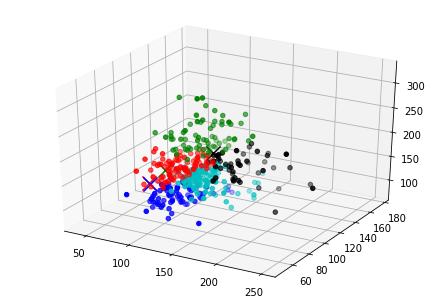

In [ ]:
vizualization3D(cluster5, centroids5, [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]])

### дано 4 змінні для кластеризації, тому для візуальної наявності можна одну відняти, наприклад "Вагу". І візуально можна краще розгледіти кластери, і чому певні дані ввійшли саме в даний кластер

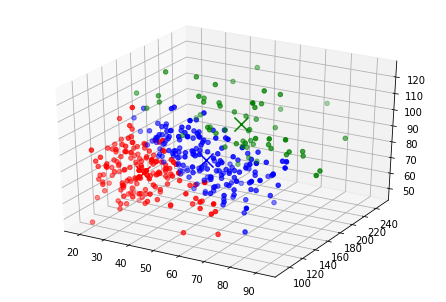

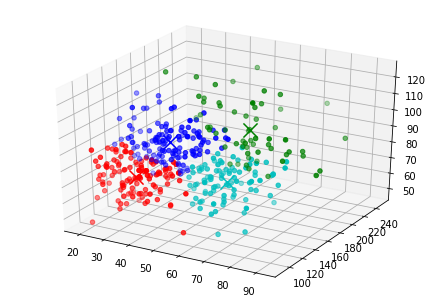

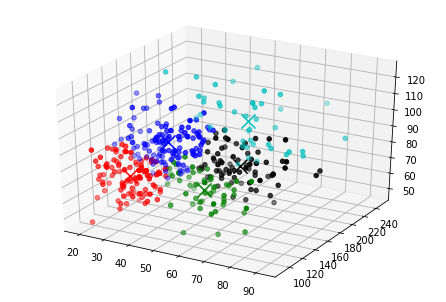

In [ ]:
data1 = data[["Вік", "Систолічний тиск", "Діастолічний тиск"]]
data1.dropna()
prepared_data1 = []
for i in range(len(data1)):
    prepared_data1.append([data1["Вік"][i], data1["Систолічний тиск"][i], data1["Діастолічний тиск"][i]])

centroids3_1, cluster3_1 = kmeans(prepared_data1, 3)
centroids4_1, cluster4_1 = kmeans(prepared_data1, 4)
centroids5_1, cluster5_1 = kmeans(prepared_data1, 5)

vizualization3D(cluster3_1, centroids3_1)
vizualization3D(cluster4_1, centroids4_1)
vizualization3D(cluster5_1, centroids5_1)

In [ ]:
i = len(cluster3_1)

for j in range(i):
    datf = pd.DataFrame(cluster3_1[j], columns=["Вік", "Систолічний тиск", "Діастолічний тиск"])
    # print(datf)
    print(datf.describe())


              Вік  Систолічний тиск  Діастолічний тиск
count  167.000000        162.000000         162.000000
mean    34.844311        118.870370          75.888889
std     10.897649         10.899392          10.815218
min     19.000000         90.000000          48.000000
25%     27.000000        110.000000          68.000000
50%     33.000000        120.000000          76.000000
75%     41.000000        125.000000          82.000000
max     68.000000        142.000000         111.000000
              Вік  Систолічний тиск  Діастолічний тиск
count  178.000000        178.000000         178.000000
mean    54.382022        140.078652          84.926966
std     13.198190          9.445921          11.187677
min     23.000000        110.000000          53.000000
25%     44.000000        135.250000          78.000000
50%     53.000000        140.000000          86.000000
75%     64.000000        146.000000          92.000000
max     84.000000        162.000000         112.000000
          